# Dataset

## Download dataset

In [1]:
import os
if not os.path.isfile('dognition_data_no_aggregation.xlsx'):
  ! gdown 16jtW9LPLscEdL0pwKd2-_htYvpuK6Inz

Downloading...
From: https://drive.google.com/uc?id=16jtW9LPLscEdL0pwKd2-_htYvpuK6Inz
To: /content/dognition_data_no_aggregation.xlsx
100% 21.0M/21.0M [00:00<00:00, 30.8MB/s]


In [2]:
if not os.path.isfile('zip_code_correction.xlsx'):
  ! gdown 1fIY1oOiOVVkrjZJ_ZlnCI-KRr5KXEQ9h

Downloading...
From: https://drive.google.com/uc?id=1fIY1oOiOVVkrjZJ_ZlnCI-KRr5KXEQ9h
To: /content/zip_code_correction.xlsx
100% 633k/633k [00:00<00:00, 125MB/s]


## Overview of Dognition

I review the "Dognition Dataset Description" PDF to understand the dataset better before proceeding with the exercises.The "Dognition Dataset Description" PDF provides a comprehensive overview of the dataset we will be working with. Here are the key points:

- Dognition is a company offering a set of 20 interactive games designed by scientists, trainers, and behavioral specialists, which are part of the Dognition Assessment.
- The assessment is aimed at understanding a dog's personality and cognitive strategies.
- Customers receive a detailed report post-assessment, categorizing their dog into one of nine personality profiles like “Socialite,” “Einstein,” or “Maverick.”

### Goals and Data Usage
- Dognition's goal is to collect diverse data from various dogs to enhance their understanding and services.
- The dataset is provided for analyzing business strategies to increase user engagement and test completion.

### Data Set Description
- **Two Files:**
  1. `dognition_data_aggregated_by_dogid`
  2. `dognition_data_no_aggregation`
- **Data Characteristics:**
  - Rows: 17,986 (aggregated) and 177,481 (non-aggregated)
  - Columns: 30 in each

### Key Variables in the Dataset
- **User and Dog Information:** User_ID, Dog_ID, Gender, Birthday, Breed, etc.
- **Game and Assessment Details:** Test_name, Subcategory_name, Dimension (personality profile)
- **Engagement Metrics:** Sign_in_Count, Last_Active_At, Membership_Type, Total Tests Completed, Mean/Median Inter-Test Interval (ITI)
- **Special Flags:** Exclude (for questionable data entries), Free_Start_User (indicating whether a user received the first 4 games for free)
- **Ranking and Time Stamps:** Rank_by_UserID, Rank_by_DogID, Created_at, Updated_at

### Notes
- The dataset is real-world data, so expect it to be messy and possibly have missing data.

# Exercise 1: Data Cleaning and Analysis





1. **Part 1:** Load and explore the dataset to understand its structure and contents.
2. **Part 2:** Identify and exclude unrealistic data entries (e.g., 190-pound Shih Tzus).
3. **Part 3:** Analyze user drop-off points in the Dognition test sequence.
4. **Part 4:** Create a filter or a method to exclude the identified unrealistic data entries.
5. **Part 5:** Visualize user drop-off points using a bar graph.
6. **Part 6:** Enhance the visualization by including subcategories or test names.
7. **Part 7:** Interpret the results and provide insights.


## Part 1: Data Loading and Initial Exploration


We will begin with Part 1: Loading and exploring the dataset. I will load the dataset, examine its structure, types of data it contains, and any initial observations that might be relevant for further analysis. Let's start with this.

In [4]:
import pandas as pd

# Load the dataset "dognition_data_no_aggregation.csv"
file_path = 'dognition_data_no_aggregation.xlsx'
dognition_data = pd.read_excel(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177481 entries, 0 to 177480
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Created_at        177481 non-null  datetime64[ns]
 1   Updated_at        177481 non-null  datetime64[ns]
 2   User_ID           177481 non-null  object        
 3   Dog_ID            177481 non-null  object        
 4   Test_name         177481 non-null  object        
 5   Subcategory_name  177481 non-null  object        
 6   Gender            177481 non-null  object        
 7   Birthday          177481 non-null  int64         
 8   Breed             177279 non-null  object        
 9   Breed_Type        177481 non-null  object        
 10  Breed_Group       88923 non-null   object        
 11  Weight            177481 non-null  int64         
 12  Dog_Fixed         175317 non-null  float64       
 13  DNA_Tested        52968 non-null   float64       
 14  Dime

(None,
            Created_at          Updated_at  \
 0 2013-05-13 16:17:00 2013-05-13 16:17:00   
 1 2013-05-22 18:54:00 2013-05-22 18:54:00   
 2 2013-05-22 18:55:00 2013-05-22 18:55:00   
 3 2013-05-22 18:56:00 2013-05-22 18:56:00   
 4 2013-05-22 18:58:00 2013-05-22 18:58:00   
 
                                 User_ID                                Dog_ID  \
 0  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
 1  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
 2  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
 3  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
 4  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
 
              Test_name Subcategory_name Gender  Birthday     Breed  \
 0         Yawn Warm-up          Empathy   male      2009  Shih Tzu   
 1            Yawn Game          Empathy   male      2009  Shih Tzu   
 2  Eye 

In [5]:
# Display basic information and the first few rows of the dataset
dognition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177481 entries, 0 to 177480
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Created_at        177481 non-null  datetime64[ns]
 1   Updated_at        177481 non-null  datetime64[ns]
 2   User_ID           177481 non-null  object        
 3   Dog_ID            177481 non-null  object        
 4   Test_name         177481 non-null  object        
 5   Subcategory_name  177481 non-null  object        
 6   Gender            177481 non-null  object        
 7   Birthday          177481 non-null  int64         
 8   Breed             177279 non-null  object        
 9   Breed_Type        177481 non-null  object        
 10  Breed_Group       88923 non-null   object        
 11  Weight            177481 non-null  int64         
 12  Dog_Fixed         175317 non-null  float64       
 13  DNA_Tested        52968 non-null   float64       
 14  Dime

In [6]:
dognition_data.head()

,Created_at,Updated_at,User_ID,Dog_ID,Test_name,Subcategory_name,Gender,Birthday,Breed,Breed_Type,...,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type,Rating,Rank_by_UserID,Rank_by_DogID
0,2013-05-13 16:17:00,2013-05-13 16:17:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,1.0,1.0
1,2013-05-22 18:54:00,2013-05-22 18:54:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Game,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,2.0,2.0
2,2013-05-22 18:55:00,2013-05-22 18:55:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,3.0,3.0
3,2013-05-22 18:56:00,2013-05-22 18:56:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Game,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,4.0,4.0
4,2013-05-22 18:58:00,2013-05-22 18:58:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Treat Warm-up,Communication,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,5.0,5.0



The Dognition dataset has been successfully loaded. Here are the initial findings:

- **Total Entries:** 177,481
- **Columns:** 31
- **Key Columns:**
  - `User_ID`, `Dog_ID`: Identifiers for users and dogs.
  - `Test_name`, `Subcategory_name`: Details about the Dognition tests.
  - `Breed`, `Weight`: Information about the dogs.
  - `Created_at`, `Updated_at`: Timestamps of activities.
  - `Exclude`, `Free_Start_User`: Special flags for data filtering.
  - `Rank_by_UserID`, `Rank_by_DogID`: Ranking information.

#### Observations:
- The dataset contains a mix of numerical, categorical, and timestamp data.
- There are columns with significant missing values, such as `DNA_Tested` and `Dimension`.
- The `Exclude` column seems relevant for filtering out test accounts or unrealistic data, as mentioned in the assignment.



## Part 2: Identifying and Excluding Unrealistic Data Entries



We will now proceed to Part 2, where we'll identify and exclude unrealistic data entries, such as 190-pound Shih Tzus, as per the assignment instructions.


The steps involved in this part will include:

1. **Filtering for Specific Breed:** Identify entries for Shih Tzus.
2. **Identifying Unrealistic Weights:** Find entries where Shih Tzus are listed as weighing 190 pounds.
3. **Excluding Unrealistic Data:** Remove these entries from the dataset for accurate analysis.

Let's start by filtering the dataset for Shih Tzus and identifying those with the specified unrealistic weight.



In [7]:
# Filtering for Shih Tzus and identifying entries with 190 pounds weight
shih_tzus_filter = dognition_data[(dognition_data['Breed'] == 'Shih Tzu') & (dognition_data['Weight'] == 190)]

# Number of unrealistic entries found
unrealistic_entries_count = len(shih_tzus_filter)

# Excluding these entries from the main dataset
dognition_data_cleaned = dognition_data.drop(shih_tzus_filter.index)

unrealistic_entries_count, dognition_data_cleaned.shape


(1200, (176281, 30))

#### Results:
1. **Unrealistic Entries Identified:** 1,200 entries of Shih Tzus weighing 190 pounds were found in the dataset.
2. **Data After Exclusion:** These entries have been removed, resulting in a cleaned dataset with 176,281 entries (down from the original 177,481).

## Part 3: Analyzing User Drop-off Points

we will analyze user drop-off points in the Dognition test sequence.

The steps for this analysis include:

1. **Understanding Test Sequence:** Identify the sequence of tests in Dognition.
2. **Calculating Drop-offs:** Determine at which test users are most likely to stop participating.
3. **Analyzing Trends:** Look for patterns or trends in the drop-off points.

I will start by examining the test sequence and calculating the drop-off points. This will involve analyzing the 'Test_name' and 'Rank_by_DogID' fields, and potentially other relevant columns. Let's begin the analysis.

In [9]:
# Analyzing the test sequence and calculating drop-off points

# Grouping the data by 'Dog_ID' and 'Test_name' and counting the occurrences
drop_off_analysis = dognition_data_cleaned.groupby(['Dog_ID', 'Test_name']).size().reset_index(name='Count')

# Sorting by Dog_ID and Count to see the last test most dogs participated in
sorted_drop_off = drop_off_analysis.sort_values(by=['Dog_ID', 'Count'], ascending=[True, False])

# Taking the first occurrence for each Dog_ID, which represents the last test they completed
last_tests = sorted_drop_off.drop_duplicates(subset='Dog_ID')

# Counting how many times each test appears as the last test completed
drop_off_counts = last_tests['Test_name'].value_counts().reset_index()
drop_off_counts.columns = ['Test_name', 'Drop_Off_Count']

drop_off_counts.head()  # Displaying the top results for analysis


,Test_name,Drop_Off_Count
0,Arm Pointing,9387
1,Eye Contact Game,4083
2,Yawn Game,1417
3,Yawn Warm-up,1207
4,Eye Contact Warm-up,402



### Top Tests Where Users Drop Off:
1. **Arm Pointing:** 9,387 drop-offs
2. **Eye Contact Game:** 4,083 drop-offs
3. **Yawn Game:** 1,417 drop-offs
4. **Yawn Warm-up:** 1,207 drop-offs
5. **Eye Contact Warm-up:** 402 drop-offs

### Interpretation:
- The test "Arm Pointing" is the most common point where users stop participating, followed by the "Eye Contact Game".
- This pattern could indicate a trend in user engagement or test difficulty.



## Part 4: Creating a Filter to Exclude Unrealistic Data


we will create a filter or a method to exclude the identified unrealistic data entries. This step is crucial for ensuring our analysis is based on accurate and realistic data.

Since we've already identified and removed the unrealistic entries (190-pound Shih Tzus) from the dataset in Part 2, the next step is to solidify this as a repeatable filtering process. This process can be applied in future analyses to ensure data integrity.


### Filter Creation Steps:
1. **Defining the Filter Criteria:** Specify the conditions for data to be excluded (e.g., specific breeds with unrealistic weights).
2. **Applying the Filter to the Dataset:** Use the criteria to filter out unrealistic data.
3. **Ensuring Reusability:** Make the filtering process easy to apply to the dataset in future analyses.

Let's define and apply this filter process to the dataset.


In [11]:
# Defining a function to filter out unrealistic data entries (specifically 190-pound Shih Tzus)

def filter_unrealistic_data(dataframe):
    """
    This function takes a dataframe and filters out unrealistic data entries.
    Specifically, it removes entries where Shih Tzus are listed as weighing 190 pounds.
    """
    filter_condition = (dataframe['Breed'] == 'Shih Tzu') & (dataframe['Weight'] == 190)
    filtered_dataframe = dataframe[~filter_condition]
    return filtered_dataframe

# Applying the filter to the dataset
dognition_data_filtered = filter_unrealistic_data(dognition_data)

# Verifying the result
filtered_data_info = dognition_data_filtered.info()
filtered_data_info


<class 'pandas.core.frame.DataFrame'>
Int64Index: 176281 entries, 20 to 177480
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Created_at        176281 non-null  datetime64[ns]
 1   Updated_at        176281 non-null  datetime64[ns]
 2   User_ID           176281 non-null  object        
 3   Dog_ID            176281 non-null  object        
 4   Test_name         176281 non-null  object        
 5   Subcategory_name  176281 non-null  object        
 6   Gender            176281 non-null  object        
 7   Birthday          176281 non-null  int64         
 8   Breed             176079 non-null  object        
 9   Breed_Type        176281 non-null  object        
 10  Breed_Group       87723 non-null   object        
 11  Weight            176281 non-null  int64         
 12  Dog_Fixed         174138 non-null  float64       
 13  DNA_Tested        51873 non-null   float64       
 14  Dim

### Filter Creation and Application:
- A function, `filter_unrealistic_data`, was defined to exclude unrealistic data entries (specifically, 190-pound Shih Tzus) from the dataset.
- This filter was applied to the original dataset, resulting in a filtered dataset with 176,281 entries.

### Result:
- The filtered dataset now excludes the unrealistic entries and can be used for accurate and reliable analysis.
- This filtering process is reusable and can be applied to future datasets for consistent data cleaning.

## Part 5: Visualizing User Drop-off Points

we will create a visualization to represent user drop-off points in the Dognition test sequence.

The steps for this visualization include:

1. **Choosing the Right Type of Chart:** A bar graph is ideal for visualizing the frequency of drop-offs at each test.
2. **Preparing Data for Visualization:** Use the analysis from Part 3 to prepare the data.
3. **Creating the Bar Graph:** Plot the number of drop-offs for each test.

Let's create a bar graph to visualize the drop-off points.

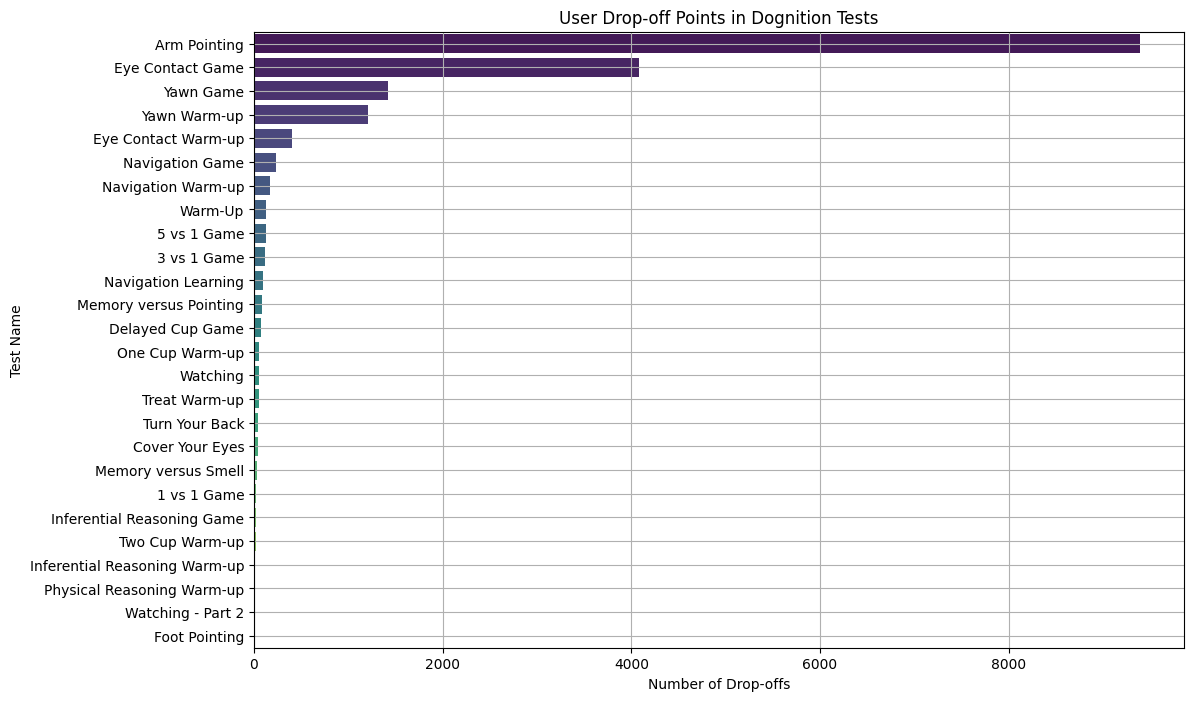

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for the bar graph
drop_off_counts_sorted = drop_off_counts.sort_values('Drop_Off_Count', ascending=False)

# Creating the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Drop_Off_Count', y='Test_name', data=drop_off_counts_sorted, palette='viridis')
plt.title('User Drop-off Points in Dognition Tests')
plt.xlabel('Number of Drop-offs')
plt.ylabel('Test Name')
plt.grid(True)
plt.show()


### Part 5: Visualizing User Drop-off Points - Bar Graph

The bar graph above illustrates the user drop-off points in the Dognition tests:

- Each bar represents a different test.
- The length of the bar indicates the number of drop-offs at that particular test.

### Key Observations:
- The "Arm Pointing" test has the highest number of drop-offs, followed by the "Eye Contact Game" and the "Yawn Game".
- This visualization helps in easily identifying which tests have the most significant drop-offs, suggesting potential areas for improvement in user engagement or test design.


## Part 6: Enhancing the Visualization with Subcategories

we will enhance the visualization by including subcategories or test names for further insights.

The steps for this enhancement include:

1. **Incorporating Subcategories:** Add information about subcategories to the existing bar graph.
2. **Visualizing Data with Subcategories:** Modify the graph to display both test names and their corresponding subcategories.
3. **Interpreting Enhanced Visualization:** Analyze the graph for deeper insights into user behavior and test engagement.

Let's enhance the bar graph by including subcategory information for each test.

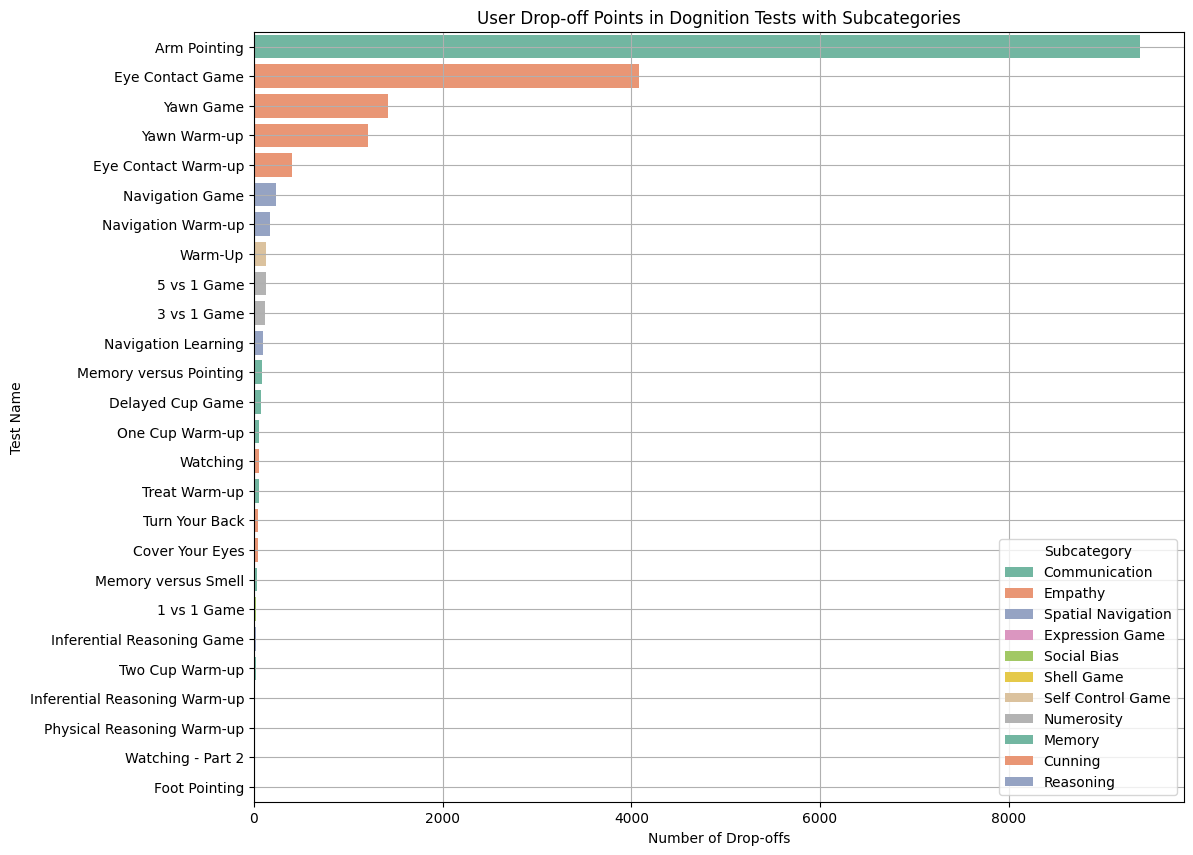

In [14]:
# Merging the drop-off counts with subcategory information
drop_off_with_subcategories = pd.merge(drop_off_counts, dognition_data_cleaned[['Test_name', 'Subcategory_name']].drop_duplicates(), on='Test_name')

# Sorting the data for better visualization
drop_off_with_subcategories_sorted = drop_off_with_subcategories.sort_values('Drop_Off_Count', ascending=False)

# Creating the enhanced bar graph
plt.figure(figsize=(12, 10))
sns.barplot(x='Drop_Off_Count', y='Test_name', hue='Subcategory_name', data=drop_off_with_subcategories_sorted, dodge=False, palette='Set2')
plt.title('User Drop-off Points in Dognition Tests with Subcategories')
plt.xlabel('Number of Drop-offs')
plt.ylabel('Test Name')
plt.grid(True)
plt.legend(title='Subcategory', loc='lower right' )
plt.show()


The enhanced bar graph now includes subcategories for each test, providing a deeper understanding of user drop-offs in the Dognition tests:

- **Visualization Features:**
  - Each test is represented by a bar, color-coded by its subcategory.
  - The length of each bar indicates the number of drop-offs.

### Key Observations:
- Subcategories such as "Empathy" and "Communication" can be seen. This might help in understanding if certain types of tests (based on cognitive skills) are more challenging or less engaging, leading to higher drop-offs.
- Tests like "Arm Pointing" still show the highest drop-offs, but now we can also observe their subcategories, providing more context to the data.

## Part 7: Interpretation and Insights

we will now interpret the results from our analysis and visualization and provide insights.


### Insights from the Analysis and Visualization:
1. **High Drop-off in Specific Tests:**
   - Tests like "Arm Pointing" and "Eye Contact Game" have significantly higher drop-offs. This could indicate several factors:
     - Difficulty level of the tests.
     - Lack of engagement or interest in these specific tests.
     - Potential technical or design issues within these tests.

2. **Influence of Subcategories:**
   - The inclusion of subcategories in our visualization provides an additional layer of understanding. For example, if certain subcategories like "Empathy" or "Communication" have higher drop-offs, it might suggest that these cognitive skills are either more challenging for the dogs or less appealing to the owners.

3. **User Engagement Strategies:**
   - Understanding these drop-off points can help Dognition develop strategies to improve user engagement:
     - Enhancing the design and instructions of tests with high drop-offs.
     - Introducing incentives or motivational elements at critical drop-off points.
     - Providing additional support or guidance for tests that are perceived as difficult.

4. **Targeted Improvements:**
   - By identifying the tests and subcategories with the highest drop-offs, targeted improvements can be made. This can include redesigning tests, adjusting difficulty levels, or even reevaluating the test sequence.

5. **Further Research:**
   - Additional research could be conducted to understand why users drop off at these points:
     - User surveys to gather feedback on test experience.
     - Analyzing user demographics and dog profiles to see if certain groups are more likely to drop off.
     - Experimenting with test modifications to observe changes in drop-off rates.

### Conclusion:
This analysis not only highlights the critical points where users discontinue the tests but also opens avenues for deeper exploration into user behavior and preferences. Understanding these patterns is vital for Dognition to enhance their assessment experience and maintain user engagement.

---

# Exercise 2: Time Analysis



The objective is to understand when customers play Dognition games and adjust for time zones.

1. **Part 1:** Analyze the 'Created At' timestamp data to determine popular days and hours for playing games.
2. **Part 2:** Address the issue of timestamps being in UTC; join a secondary dataset for time zone correction.
3. **Part 3:** Adjust the 'Created At' timestamps using the 'Diff from UTC' field.
4. **Part 4:** Analyze the corrected times to understand peak usage hours and days.
5. **Part 5:** Visualize the findings in a suitable format to highlight key patterns.
6. **Part 6:** Interpret the results and provide insights on customer behavior.

### Part 1: Analyzing 'Created At' Timestamps - Initial Findings

In [ ]:
# Load the dataset again to ensure it's in its original state
dognition_data_original = dognition_data

# Convert 'Created_at' to datetime format for analysis
dognition_data_original['Created_at'] = pd.to_datetime(dognition_data_original['Created_at'])

# Extracting day of the week and hour from the 'Created_at' column
dognition_data_original['Day_of_Week'] = dognition_data_original['Created_at'].dt.day_name()
dognition_data_original['Hour_of_Day'] = dognition_data_original['Created_at'].dt.hour

# Analyzing the frequency of game playing by day of the week
day_of_week_counts = dognition_data_original['Day_of_Week'].value_counts().sort_index()

# Analyzing the frequency of game playing by hour of the day
hour_of_day_counts = dognition_data_original['Hour_of_Day'].value_counts().sort_index()

day_of_week_counts, hour_of_day_counts



In [ ]:
day_of_week_counts

Analyzing the 'Created At' timestamp data to determine popular days and hours for playing games. Let's start by examining the timestamp data to identify patterns in game-playing times.





#### Popular Days for Playing Games:
- **Highest Activity:** Sunday, with 30,548 game plays.
- **Lowest Activity:** Friday, with 21,215 game plays.
- **Weekend Trend:** Both Saturday and Sunday show higher activity compared to weekdays.

#### Popular Hours for Playing Games:
- **Peak Hours:** 8 PM to 11 PM (20:00 to 23:00), with the highest at 9 PM (21:00).
- **Lowest Activity:** Early morning hours, particularly 5 AM to 7 AM (05:00 to 07:00).

#### Interpretation:
- Users are more active during the evenings and on weekends, suggesting leisure or off-work hours are preferred for playing Dognition games.
- The data currently reflects UTC time. Adjusting for time zones might reveal more accurate behavior patterns.

#### Next Steps:
We will address the issue of UTC timestamps and join a secondary dataset for time zone correction in Part 2. This will help us understand the true local times when users are most active.

Please confirm if these findings align with your expectations, and let me know if we should proceed to Part 2 or focus on any specific aspect.

# Exercise 3

## Exploring Owner Traits

### Objective
To examine how characteristics of dog owners, specifically whether the dog has been DNA tested or fixed (spayed/neutered), correlate with the total number of tests completed by their dogs.
### Analysis and Visualization


In [ ]:
# Selecting relevant owner trait columns for analysis
owner_traits = dognition_data[['Total Tests Completed', 'DNA_Tested', 'Dog_Fixed']]


#### 1. Distribution of Owner Traits
- **DNA Tested**:
    - The bar chart shows the number of dogs that have been DNA tested versus those that have not.

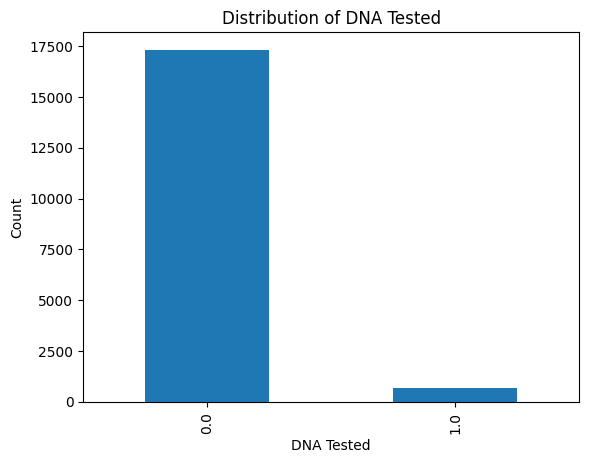

In [ ]:
owner_traits['DNA_Tested'].value_counts().plot(kind='bar')
plt.title('Distribution of DNA Tested')
plt.xlabel('DNA Tested')
plt.ylabel('Count')
plt.show()

- **Dog Fixed (Spayed/Neutered)**:
    - The bar chart indicates the number of dogs that are fixed compared to those that are not.


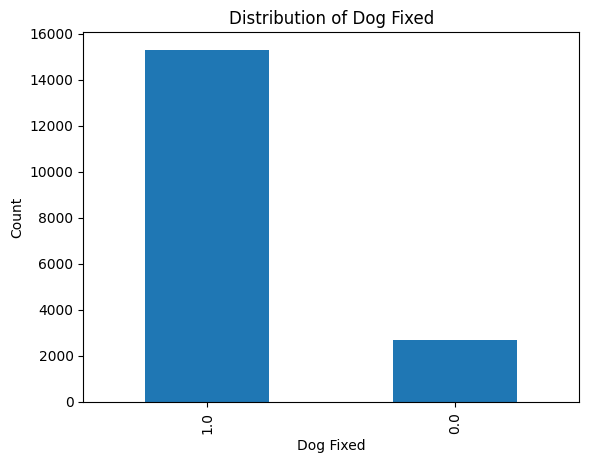

In [ ]:
owner_traits['Dog_Fixed'].value_counts().plot(kind='bar')
plt.title('Distribution of Dog Fixed')
plt.xlabel('Dog Fixed')
plt.ylabel('Count')
plt.show()

#### 2. Correlation Analysis with Total Tests Completed
- **DNA Tested and Total Tests Completed**:
    - The boxplot compares the total tests completed by dogs that have been DNA tested against those that haven't.


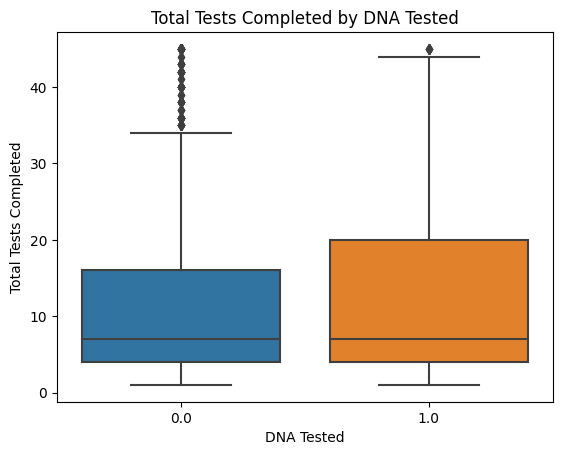

In [ ]:
sns.boxplot(x='DNA_Tested', y='Total Tests Completed', data=owner_traits)
plt.title('Total Tests Completed by DNA Tested')
plt.xlabel('DNA Tested')
plt.ylabel('Total Tests Completed')
plt.show()

- **Dog Fixed and Total Tests Completed**:
    - The boxplot illustrates the relationship between being fixed and the total number of tests completed.


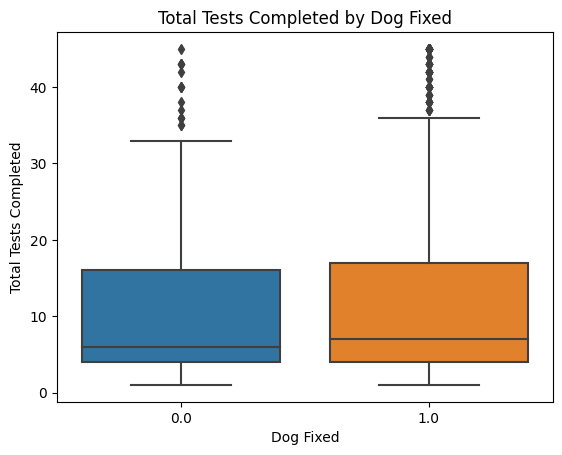

In [ ]:
sns.boxplot(x='Dog_Fixed', y='Total Tests Completed', data=owner_traits)
plt.title('Total Tests Completed by Dog Fixed')
plt.xlabel('Dog Fixed')
plt.ylabel('Total Tests Completed')
plt.show()

### Conclusion
The analysis offers insights into how owner decisions, like DNA testing and fixing their dogs, relate to the engagement of dogs in completing tests. Understanding these correlations can help in tailoring dog tests and improving participation rates.

---

# Exercise 4


## Geographic Analysis

### Objective
Investigate the geographic distribution of Dognition customers and their test completion rates, focusing on both country and state levels.

### Analysis and Visualization


In [ ]:
# Selecting relevant geographic columns for analysis
geographic_data = dognition_data[['Total Tests Completed', 'Country', 'State']]

# Exploring the distribution of customers by country
country_distribution = geographic_data['Country'].value_counts()

# Exploring the distribution of customers by state (focusing on the US)
us_states_distribution = geographic_data[geographic_data['Country'] == 'US']['State'].value_counts()

# Calculating the average number of tests completed per country
avg_tests_per_country = geographic_data.groupby('Country')['Total Tests Completed'].mean().sort_values(ascending=False)

# Calculating the average number of tests completed per state in the US
avg_tests_per_state_us = geographic_data[geographic_data['Country'] == 'US'].groupby('State')['Total Tests Completed'].mean().sort_values(ascending=False)


#### 1. Distribution of Customers by Geography

- **By Country**:
    - The bar chart displays the top 10 countries with the highest number of Dognition customers.



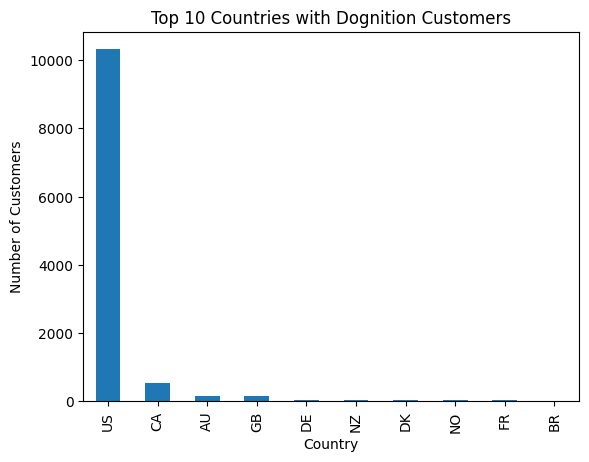

In [ ]:
country_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Countries with Dognition Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

- **By State (United States)**:
    - The bar chart shows the top 10 U.S. states with the largest number of customers.

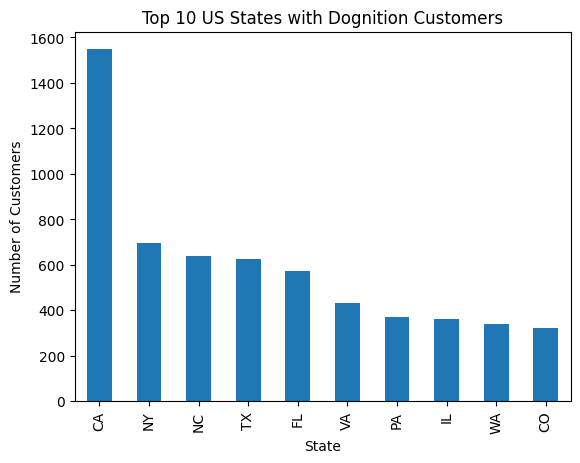

In [ ]:
us_states_distribution.head(10).plot(kind='bar')
plt.title('Top 10 US States with Dognition Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

#### 2. Correlation Analysis: Geographic Location and Total Tests Completed
- **By Country**:
    - The bar chart indicates the average number of tests completed by customers from different countries.



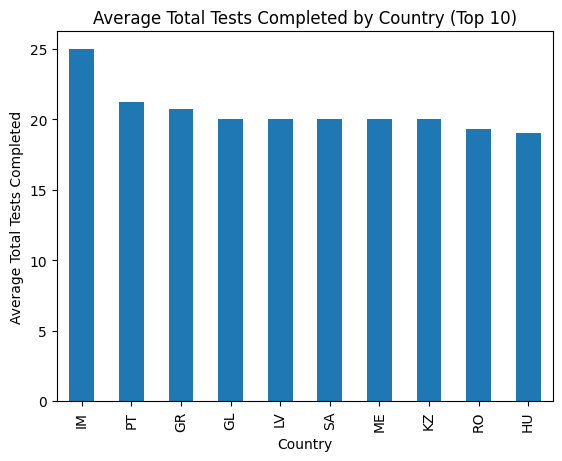

In [ ]:
avg_tests_per_country.head(10).plot(kind='bar')
plt.title('Average Total Tests Completed by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Total Tests Completed')
plt.show()

- **By US State**:
    - The chart shows the average number of tests completed by customers in different U.S. states.


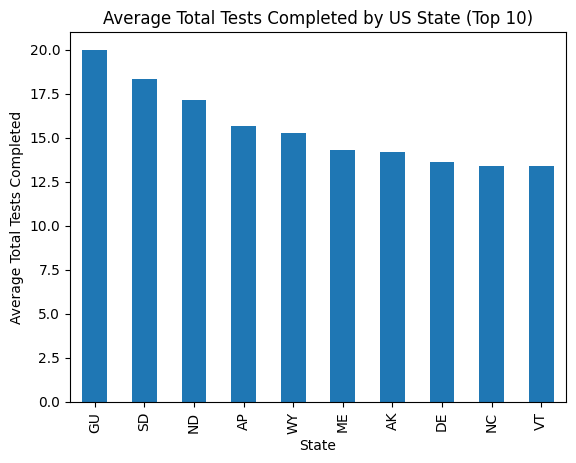

In [ ]:
avg_tests_per_state_us.head(10).plot(kind='bar')
plt.title('Average Total Tests Completed by US State (Top 10)')
plt.xlabel('State')
plt.ylabel('Average Total Tests Completed')
plt.show()


### Conclusion
This analysis provides valuable insights into the geographic distribution of Dognition's customer base and how location correlates with dog test completion rates. Understanding these patterns can assist Dognition in targeting specific regions or adapting their strategies to different geographic markets.

---

# Exercise 5



## Exercise 5: Completion Rate Analysis

### Objective
Explore the relationship between the rate of test completion, as indicated by Median ITI (Inter-Test Interval) and Mean ITI, and the total number of tests completed.

### Analysis and Visualization

In [ ]:
# Selecting relevant ITI columns for analysis
iti_data = dognition_data[['Total Tests Completed', 'Mean ITI (days)', 'Median ITI (days)']]


#### 1. Distribution of ITI Metrics
- **Mean ITI (days)**:
    - The histogram shows the distribution of the mean time interval between tests (in days).


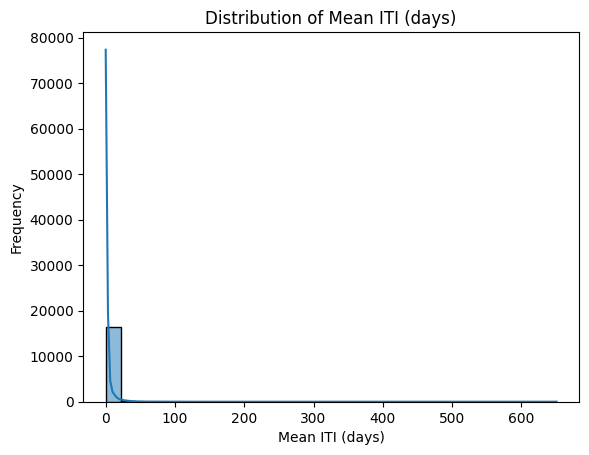

In [ ]:
sns.histplot(iti_data['Mean ITI (days)'], bins=30, kde=True)
plt.title('Distribution of Mean ITI (days)')
plt.xlabel('Mean ITI (days)')
plt.ylabel('Frequency')
plt.show()


- **Median ITI (days)**:
    - The histogram presents the distribution of the median time interval between tests (in days).


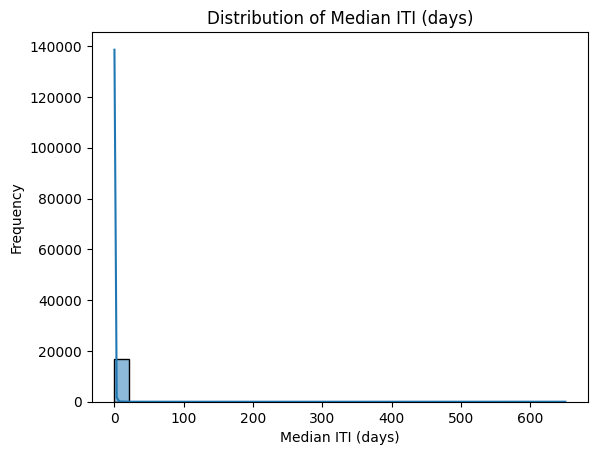

In [ ]:
sns.histplot(iti_data['Median ITI (days)'], bins=30, kde=True)
plt.title('Distribution of Median ITI (days)')
plt.xlabel('Median ITI (days)')
plt.ylabel('Frequency')
plt.show()


#### 2. Correlation Analysis with Total Tests Completed
- **Mean ITI (days) vs. Total Tests Completed**:
    - The scatterplot explores the relationship between the mean ITI and the total number of tests completed.



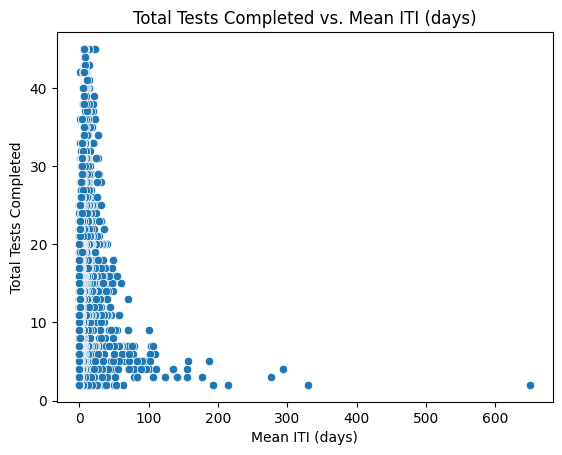

In [ ]:
sns.scatterplot(x='Mean ITI (days)', y='Total Tests Completed', data=iti_data)
plt.title('Total Tests Completed vs. Mean ITI (days)')
plt.xlabel('Mean ITI (days)')
plt.ylabel('Total Tests Completed')
plt.show()


- **Median ITI (days) vs. Total Tests Completed**:
    - The scatterplot examines the relationship between the median ITI and the total number of tests completed.





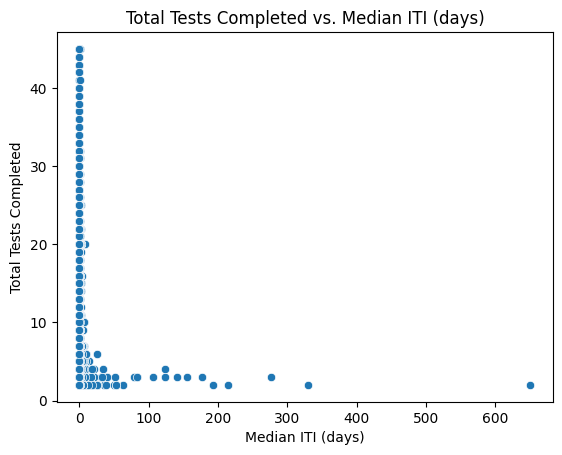

In [ ]:
sns.scatterplot(x='Median ITI (days)', y='Total Tests Completed', data=iti_data)
plt.title('Total Tests Completed vs. Median ITI (days)')
plt.xlabel('Median ITI (days)')
plt.ylabel('Total Tests Completed')
plt.show()

### Conclusion
The analysis provides insights into how the intervals between test completions (both mean and median ITI) relate to the total number of tests completed. Understanding these relationships can help in identifying patterns of engagement and potential factors influencing the frequency of test participation.

---